In [1]:
bersatulawancovid = ['cuci tangan', 'pakai masker', 'jaga jarak']
print(bersatulawancovid)

['cuci tangan', 'pakai masker', 'jaga jarak']


In [2]:
import requests
resp = requests.get('https://data.covid19.go.id/public/api/update.json')

In [3]:
print (resp)

<Response [200]>


In [4]:
print(resp.headers)

{'Server': 'nginx', 'Date': 'Sat, 28 Aug 2021 08:45:41 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Sat, 28 Aug 2021 08:45:09 GMT', 'ETag': 'W/"6129f795-3365d"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


In [5]:
cov_id_raw  = resp.json()

In [6]:
print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw  : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


In [7]:
print('Tanggal pembaharuan data penambahan kasus :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini:', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus : 2021-08-27
Jumlah penambahan kasus sembuh : 19290
Jumlah penambahan kasus meninggal : 599
Jumlah total kasus positif hingga saat ini : 4056354
Jumlah total kasus meninggal hingga saat ini: 130781


In [8]:
import requests
resp_jatim = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json')
cov_jatim_raw = resp_jatim.json()

In [9]:
print('Nama-nama elemen utama:\n', cov_jatim_raw.keys())
print('\nJumlah total kasus COVID-19 di Jawa Timur : %d' %cov_jatim_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Timur : %f.2%%' %cov_jatim_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Timur : %f.2%%' %cov_jatim_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Timur : 372388
Persentase kematian akibat COVID-19 di Jawa Timur : 7.213444.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Timur : 87.493152.2%


In [10]:
import numpy as np
import pandas as pd
cov_jatim = pd.DataFrame(cov_jatim_raw['list_perkembangan'])
print('Info cov_jatim:\n', cov_jatim.info())
print('\nLima data teratas cov_jatim:\n', cov_jatim.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       593 non-null    int64
 1   KASUS                         593 non-null    int64
 2   MENINGGAL                     593 non-null    int64
 3   SEMBUH                        593 non-null    int64
 4   DIRAWAT_OR_ISOLASI            593 non-null    int64
 5   AKUMULASI_KASUS               593 non-null    int64
 6   AKUMULASI_SEMBUH              593 non-null    int64
 7   AKUMULASI_MENINGGAL           593 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  593 non-null    int64
dtypes: int64(9)
memory usage: 41.8 KB
Info cov_jatim:
 None

Lima data teratas cov_jatim:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1578441600000      9  ...                    3                             5
1  1578528000000 

In [11]:
cov_jatim_tidy = (cov_jatim.drop(columns=[item for item in cov_jatim.columns
																if item.startswith('AKUMULASI')
																or item.startswith('DIRAWAT')])
												.rename(columns=str.lower)
												.rename(columns={'kasus': 'kasus_baru'})
				  )
cov_jatim_tidy['tanggal'] = pd.to_datetime(cov_jatim_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jatim_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-01-08           9          3       1
1 2020-01-09           0          1      23
2 2020-01-10           0          1      14
3 2020-01-11           0          3       8
4 2020-01-12           0          3       1


In [12]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

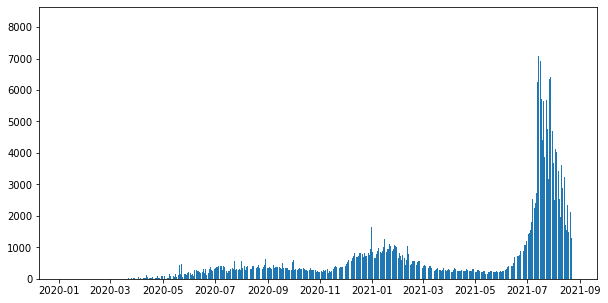

In [13]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jatim_tidy, x='tanggal', height='kasus_baru')
plt.show()

<Figure size 432x288 with 0 Axes>

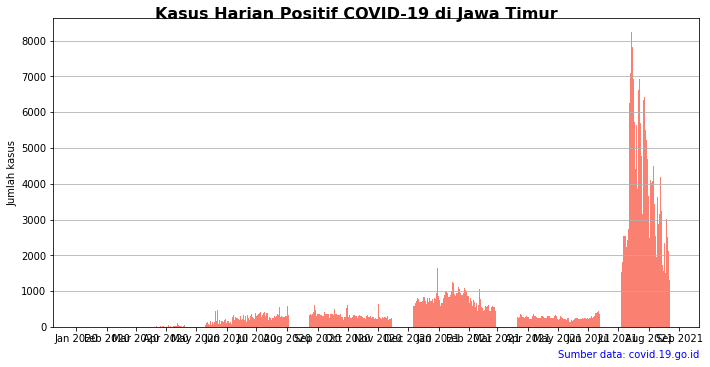

In [14]:
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jatim_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Timur',
y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
		ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

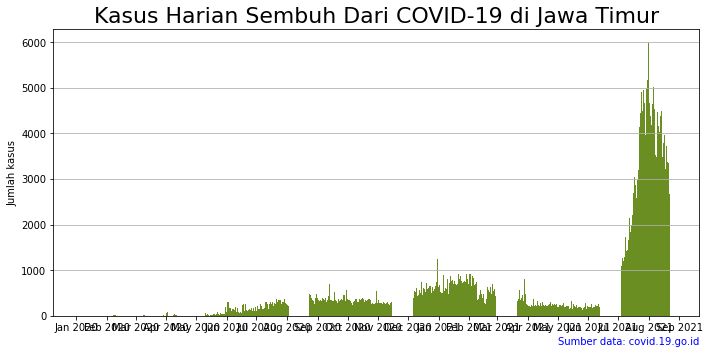

In [15]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jatim_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Timur',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

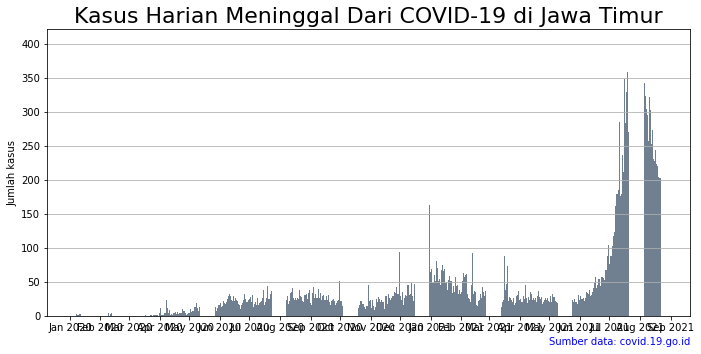

In [16]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jatim_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Timur',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [17]:
cov_jatim_pekanan = (cov_jatim_tidy.set_index('tanggal')['kasus_baru']
					  .resample('W')
					  .sum()
					  .reset_index()
					  .rename(columns={'kasus_baru': 'jumlah'})
)
cov_jatim_pekanan['tahun'] = cov_jatim_pekanan['tanggal'].apply(lambda x: x.year)
cov_jatim_pekanan['pekan_ke'] = cov_jatim_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jatim_pekanan = cov_jatim_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jatim_pekanan:')
print(cov_jatim_pekanan.info())
print('\nLima data teratas cov_jatim_pekanan:\n', cov_jatim_pekanan.head())

Info cov_jatim_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     85 non-null     int64
 1   pekan_ke  85 non-null     int64
 2   jumlah    85 non-null     int64
dtypes: int64(3)
memory usage: 2.1 KB
None

Lima data teratas cov_jatim_pekanan:
    tahun  pekan_ke  jumlah
0   2020         2       9
1   2020         3       0
2   2020         4       0
3   2020         5       0
4   2020         6       0


In [18]:
cov_jatim_pekanan['jumlah_pekanlalu'] = cov_jatim_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jatim_pekanan['lebih_baik'] = cov_jatim_pekanan['jumlah'] < cov_jatim_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jatim_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020         2       9                 0       False
1   2020         3       0                 9        True
2   2020         4       0                 0       False
3   2020         5       0                 0       False
4   2020         6       0                 0       False
5   2020         7       0                 0       False
6   2020         8       0                 0       False
7   2020         9       0                 0       False
8   2020        10       0                 0       False
9   2020        11       0                 0       False


<Figure size 432x288 with 0 Axes>

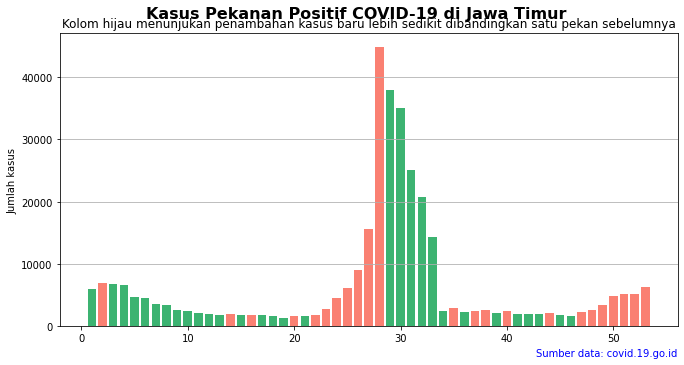

In [19]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jatim_pekanan, x='pekan_ke', height='jumlah',
color=['mediumseagreen' if x is True else 'salmon' for x in cov_jatim_pekanan['lebih_baik']])
fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Timur',
y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [20]:
cov_jatim_akumulasi = cov_jatim_tidy[['tanggal']].copy()
cov_jatim_akumulasi['akumulasi_aktif'] = (cov_jatim_tidy['kasus_baru'] - cov_jatim_tidy['sembuh'] - cov_jatim_tidy['meninggal']).cumsum()
cov_jatim_akumulasi['akumulasi_sembuh'] = cov_jatim_tidy['sembuh'].cumsum()
cov_jatim_akumulasi['akumulasi_meninggal'] = cov_jatim_tidy['meninggal'].cumsum()
cov_jatim_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
588,2021-08-18,27876,309701,25861
589,2021-08-19,26943,313433,26081
590,2021-08-20,25861,316819,26285
591,2021-08-21,24420,320179,26488
592,2021-08-22,22837,322860,26691


<Figure size 432x288 with 0 Axes>

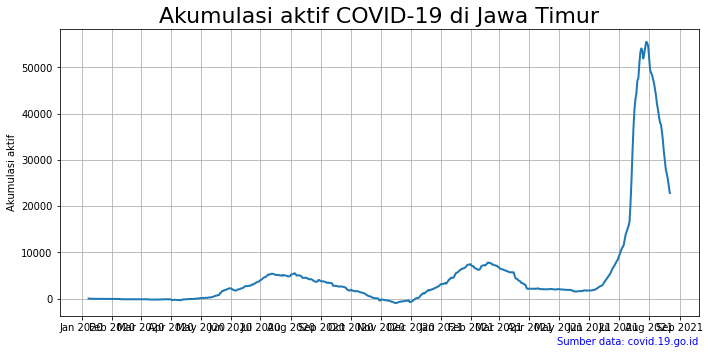

In [21]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jatim_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Timur',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

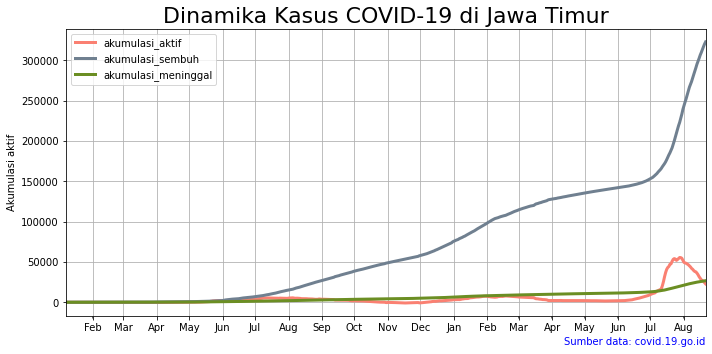

In [22]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_jatim_akumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3,
color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Timur',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()